# Reilly Capstone - Key Measures by Retention Score


## Import Libraries

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# inline ploting
%matplotlib inline

## Load and review data

In [2]:
df =pd.read_csv ("C:/Users/reillyd/Desktop/Machine Learning A-Z Template Folder/Retention.csv")

In [ ]:
df = df.reindex(np.random.permutation(df.index))

In [3]:
df.shape

(398, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
Engage       398 non-null int64
Leave        398 non-null int64
Resil        398 non-null float64
SOB          398 non-null int64
SAT          398 non-null int64
Retention    398 non-null float64
dtypes: float64(2), int64(4)
memory usage: 18.7 KB


In [5]:
df.head(10)

,Engage,Leave,Resil,SOB,SAT,Retention
0,1,1,4.0,-2,1,0.583387
1,1,0,2.5,1,2,0.521631
2,1,0,4.0,2,2,0.728715
3,0,1,4.0,-2,1,0.805405
4,0,1,2.5,0,1,0.839963
5,2,0,3.5,1,1,0.830012
6,2,1,3.0,1,1,0.783927
7,1,0,3.0,-1,1,0.782054
8,1,0,2.5,1,0,0.733679
9,0,1,4.0,-1,0,0.877860


## Check Null

In [6]:
df.isnull().values.any()

False

## Correlation Check

In [8]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


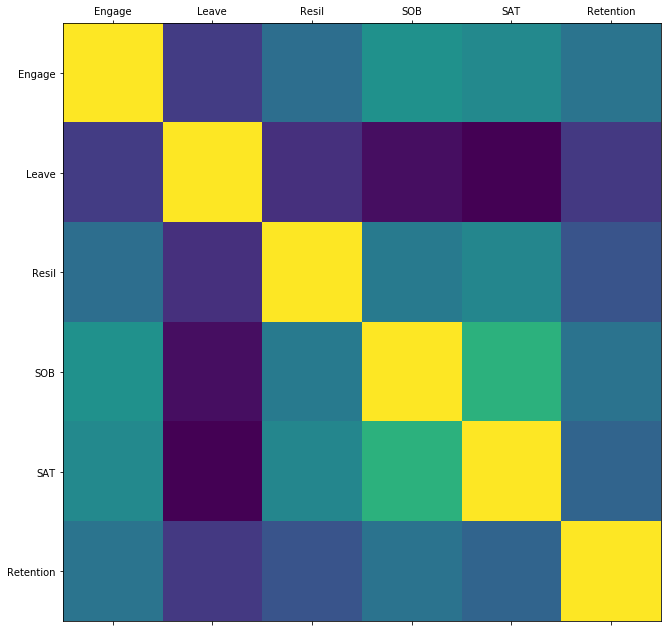

In [9]:
plot_corr(df)

In [10]:
df.corr()

,Engage,Leave,Resil,SOB,SAT,Retention
Engage,1.000000,-0.062763,0.173751,0.360270,0.316468,0.204154
Leave,-0.062763,1.000000,-0.112119,-0.241500,-0.290271,-0.073904
Resil,0.173751,-0.112119,1.000000,0.234091,0.301738,0.043516
SOB,0.360270,-0.241500,0.234091,1.000000,0.541184,0.200027
SAT,0.316468,-0.290271,0.301738,0.541184,1.000000,0.126764
Retention,0.204154,-0.073904,0.043516,0.200027,0.126764,1.000000


In [11]:
df.head(5)

,Engage,Leave,Resil,SOB,SAT,Retention
0,1,1,4.0,-2,1,0.583387
1,1,0,2.5,1,2,0.521631
2,1,0,4.0,2,2,0.728715
3,0,1,4.0,-2,1,0.805405
4,0,1,2.5,0,1,0.839963


## Split Data

In [16]:
X = np.array(df.iloc[:,:-1])[:, [0,1,2,3]]
y = np.array(df.Retention)

print('X', X.shape, 'y', y.shape)
                                # Refresher: This is a dictionary comprehension
# print('Label distribution:', {i: np.sum(y==i) for i in np.unique(df.Retention)})
                                # For each unique value in the quality column, 
                                #     count the number of times it occurs 
                                #      and store it in the dictionary with the quality as the key

X (398, 4) y (398,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LinearRegression()     # this is a blank model
model.fit(X_train, y_train)    # Train the model against the data
model.score(X_test, y_test)

-0.018135736119381907

In [20]:
from sklearn.metrics import mean_squared_error

# Measure the model error based on expected output and predicted output
mean_squared_error(y, model.predict(X))  # also known as   MSE

0.0029050256743153521

### Shape

In [22]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (298, 4)
y_train shape: (298,)


## Linear Regression

In [49]:
import statsmodels.api as sm

In [50]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.01895
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.999
Time:                        21:25:19   Log-Likelihood:                -405.28
No. Observations:                 298   AIC:                             818.6
Df Residuals:                     294   BIC:                             833.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0093      0.060      0.155      0.877      -0.108       0.127
x2            -0.0050      0.057     -0.088      0.930      -0.117       0.107
x3            -0.0060      0.057     -0.106      0.916      -0.118       0.106
x4             0.0072      0.062      0.115      0.908      -0.115       0.130
==============================================================================
Omnibus:                      187.942   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.451
Skew:                          -2.574   Prob(JB):                         0.00
Kurtosis:                      12.550   Cond. No.                         1.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""